In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs



In [ ]:
customers=pd.read_excel('D:/Priyanka/data 360/machine learning/casestudies/4/CustomersData.xlsx')
discount=pd.read_csv('D:/Priyanka/data 360/machine learning/casestudies/4/Discount_Coupon.csv')
marketing=pd.read_csv('D:/Priyanka/data 360/machine learning/casestudies/4/Marketing_Spend.csv')
onlinesales=pd.read_csv('D:/Priyanka/data 360/machine learning/casestudies/4/Online_Sales.csv')
taxamt=pd.read_excel('D:/Priyanka/data 360/machine learning/casestudies/4/Tax_Amount.xlsx')

In [ ]:
customers

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


In [ ]:
discount

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [ ]:
marketing

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30
...,...,...,...
360,12/27/2019,4000,3396.87
361,12/28/2019,4000,3246.84
362,12/29/2019,4000,2546.58
363,12/30/2019,4000,674.31


In [ ]:
onlinesales

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,20191231,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked
52920,14410,48494,20191231,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used
52921,14410,48495,20191231,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used
52922,14600,48496,20191231,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked


In [ ]:
taxamt

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [ ]:
onlinesales.Transaction_Date=pd.to_datetime(onlinesales.Transaction_Date,format='%Y%m%d')
onlinesales['Month']=onlinesales['Transaction_Date'].dt.strftime('%b')

In [ ]:
onlinesales['month_int']=np.where(onlinesales.Month == 'Jan',1,np.where(onlinesales.Month == 'Feb',2,np.where(onlinesales.Month == 'Mar',3,np.where(onlinesales.Month == 'Apr',4,np.where(onlinesales.Month == 'May',5,np.where(onlinesales.Month == 'Jun',6,np.where(onlinesales.Month == 'Jul',7,np.where(onlinesales.Month == 'Aug',8,np.where(onlinesales.Month == 'Sep',9,np.where(onlinesales.Month == 'Oct',10,np.where(onlinesales.Month == 'Nov',11,12)))))))))))

#### 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level
##### • Invoice Value = (( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST)) + Delivery_Charges


In [ ]:
sales_discount=pd.merge(left=onlinesales,right=discount,left_on=['Product_Category','Month'],right_on=['Product_Category ','Month'],how='left')
sales_discount.loc[sales_discount['Coupon_Status'] != 'Used', 'Discount_pct'] = 0

In [ ]:
sdt=pd.merge(left=sales_discount,right=taxamt,left_on='Product_Category',right_on='Product_Category',how='left')

In [ ]:
prdisc=((sdt.Quantity*sdt.Avg_Price)-(((sdt.Quantity*sdt.Avg_Price))*(sdt.Discount_pct/100)))
sdt['invoice_value']=prdisc+((sdt.GST)*prdisc)

#### 2. Perform Detailed exploratory analysis
##### • Understanding how many customers acquired every month


In [ ]:
cust_mon=onlinesales.loc[:, ['CustomerID', 'Month']]
new_cust=cust_mon.drop_duplicates(subset='CustomerID').groupby(by='Month')[['CustomerID']].count()
new_cust

,CustomerID
Month,
Apr,163
Aug,135
Dec,106
Feb,96
Jan,215
Jul,94
Jun,137
Mar,177
May,112


##### Understand the retention of customers on month on month basis

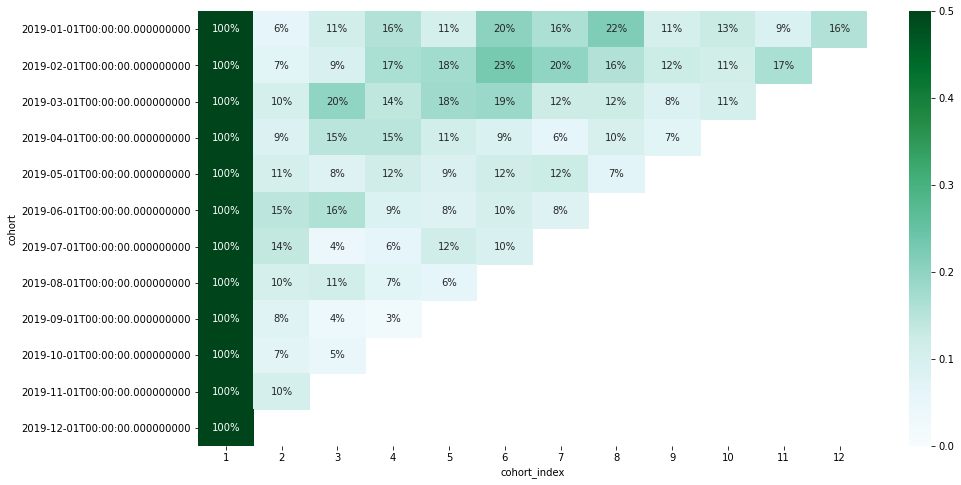

In [ ]:
## performing cohort analysis for customer retention
onlinesales['transaction_month']=onlinesales.Transaction_Date.apply(lambda x :dt.datetime(x.year, x.month, 1))
grouping = onlinesales.groupby('CustomerID')['transaction_month']
onlinesales['cohort'] = grouping.transform('min')

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    date = df[column].dt.date
    return year, month, date
transaction_year,transaction_month, _=get_date_int(onlinesales,'transaction_month')
cohort_year,cohort_month, _= get_date_int(onlinesales,'cohort')
year_diff = transaction_year - cohort_year
month_diff = transaction_month - cohort_month
onlinesales['cohort_index'] = year_diff*12 + month_diff +1

grouping1 = onlinesales.groupby(['cohort', 'cohort_index'])

cohort_data = grouping1['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index="cohort",columns="cohort_index",values="CustomerID")
retention = cohort_counts


cohort_size = cohort_counts.iloc[:,0]

retention_per = cohort_counts.divide(cohort_size, axis=0)

retention_per.round(3)*100

plt.figure(figsize=(15,8))
sns.heatmap(data = retention_per,annot=True,fmt='.0%',vmin=0.0,vmax=0.5,cmap='BuGn')
plt.show()

##### • How the discounts playing role in the revenues?


<AxesSubplot:xlabel='Discount_pct'>

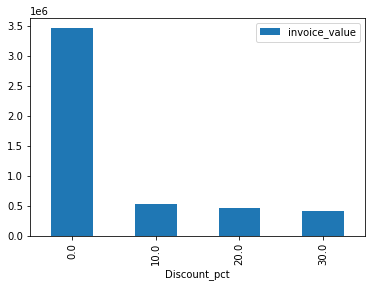

In [ ]:
d1=sdt.groupby(by='Discount_pct')[['invoice_value']].sum()
d1.plot(kind='bar')

##### • Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…

In [ ]:
sdt.pivot_table(index =['Month','Product_Category'],
                       aggfunc ={'invoice_value':['sum'],'Avg_Price':['mean'],'Quantity':['sum'],'Transaction_ID':['count'],'CustomerID':['count'] })

Avg_Price CustomerID Quantity Transaction_ID  \
                                  mean      count      sum          count   
Month Product_Category                                                      
Apr   Accessories            41.740000          4        4              4   
      Android                19.990000          2        2              2   
      Apparel                22.758407       1582     4052           1582   
      Backpacks              74.826364         11       16             11   
      Bags                   33.033172        145     1344            145   
...                                ...        ...      ...            ...   
Sep   Nest-Canada           160.333333         15       21             15   
      Nest-USA              123.681529        942     1434            942   
      Notebooks & Journals    9.759412         51      640             51   
      Office                  2.654680        485     5514            485   
      Waze                    6.195405         37       49             37   

                           invoice_value  
                                     sum  
Month Product_Category                    
Apr   Accessories              178.15710  
      Android                   41.77910  
      Apparel               100942.74718  
      Backpacks                566.64300  
      Bags                   13013.43648  
...                                  ...  
Sep   Nest-Canada             3413.41000  
      Nest-USA              166167.65000  
      Notebooks & Journals    7387.98585  
      Office                 13575.69620  
      Waze                     334.29754  

[207 rows x 5 columns]

##### • Understand the trends/seasonality of sales by category, location, month etc…

In [ ]:
sdtc=pd.merge(left=sdt,right=customers,on='CustomerID',how='left')

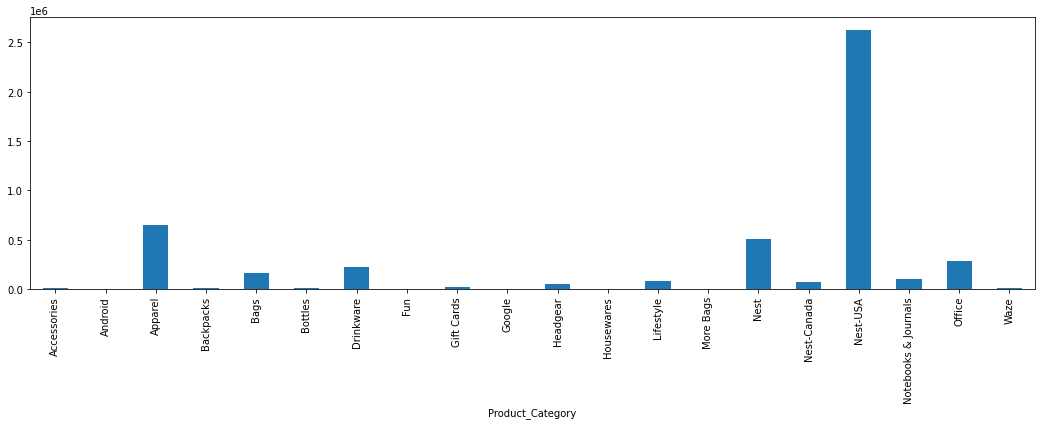

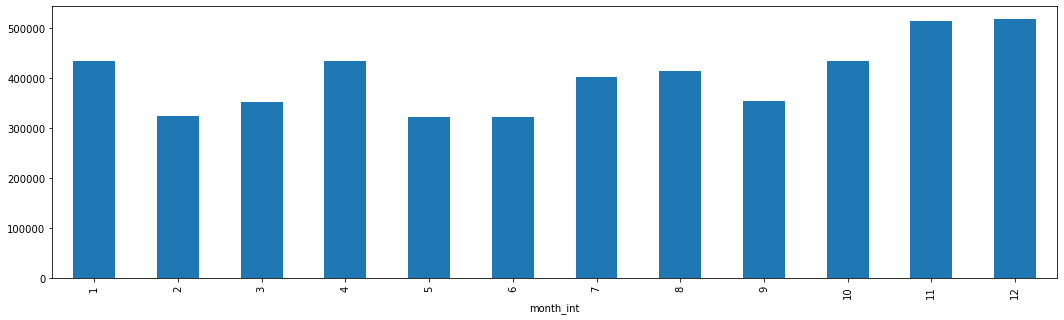

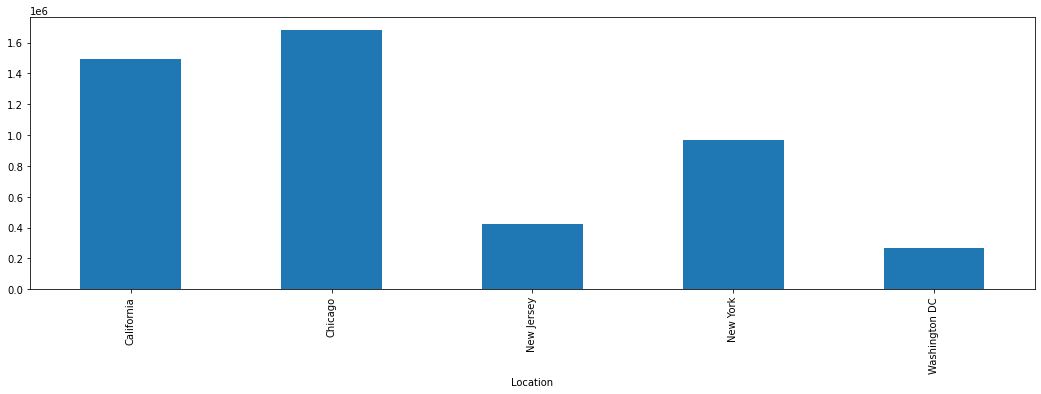

In [ ]:
## getting trends for quantity with payment type , prod cat etc
pay_quan=  sdtc.groupby('Product_Category')['invoice_value'].sum()
pro_quan = sdtc.groupby('month_int')['invoice_value'].sum()
pro_loc = sdtc.groupby('Location')['invoice_value'].sum()
ss1 = [pay_quan,pro_quan,pro_loc]
for i in ss1:
    i.plot(kind='bar',figsize=(18,5))
    plt.show()


##### • How number order varies and sales with different days?

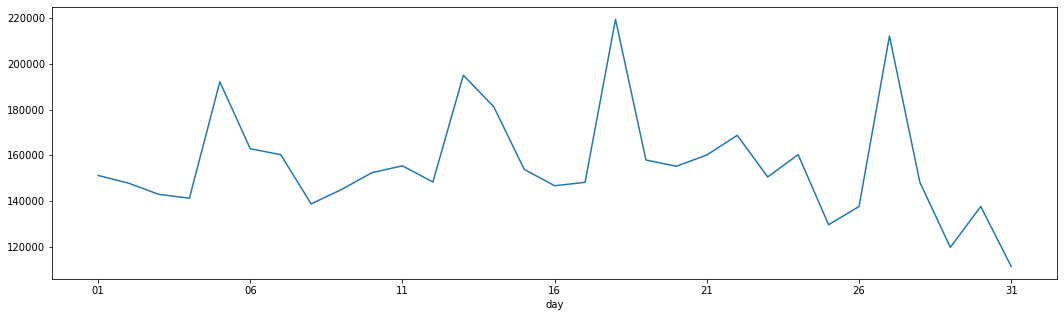

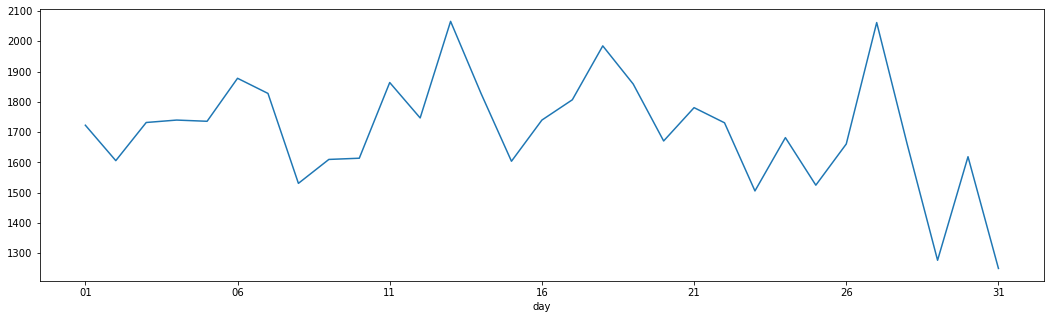

In [ ]:
sdtc['day']=sdtc.Transaction_Date.dt.strftime('%d')
p1=  sdtc.groupby('day')['invoice_value'].sum()
p2 = sdtc.groupby('day')['Transaction_ID'].count()
ss2 = [p1,p2]
for i in ss2:
    i.plot(kind='line',figsize=(18,5))
    plt.show()


##### • Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.


In [ ]:
marketing.Date=pd.to_datetime(marketing.Date,format='%m/%d/%Y')
marketing['Month']=marketing.Date.dt.strftime('%b')
mark=marketing.groupby(by='Month',as_index=False)[['Offline_Spend','Online_Spend']].sum()
rev=sdtc.groupby(by='Month',as_index=False)[['invoice_value']].sum()
deli=sdtc.groupby(by='Month',as_index=False)[['Delivery_Charges']].sum()
mr=pd.merge(mark,rev,on='Month')
mrd=pd.merge(mr,deli,on='Month')
mrd['marketing_spend']=mrd.Offline_Spend+mrd.Online_Spend
mrd.drop(['Offline_Spend','Online_Spend'],axis=1,inplace=True)
mrd['spend%_marketing']=(mrd.marketing_spend/mrd.invoice_value)*100
mrd['spend%_delivery']=(mrd.Delivery_Charges/mrd.invoice_value)*100

In [ ]:
mrd

,Month,invoice_value,Delivery_Charges,marketing_spend,spend%_marketing,spend%_delivery
0,Apr,433936.88242,41481.74,157026.83,36.186560,9.559395
1,Aug,414066.92294,61099.57,142904.15,34.512332,14.755965
2,Dec,518230.30179,37881.99,198648.75,38.332137,7.309876
3,Feb,325396.80890,49216.60,137107.92,42.135607,15.125102
4,Jan,434282.13775,59242.32,154928.95,35.674723,13.641436
5,Jul,401989.61084,48723.93,120217.85,29.905711,12.120694
6,Jun,323033.72389,37513.58,134318.14,41.580222,11.612899
7,Mar,351816.59564,60799.94,122250.09,34.748244,17.281715
8,May,323150.64876,41396.17,118259.64,36.595823,12.810177
9,Nov,515388.20726,32311.93,161144.96,31.266715,6.269435


##### • How marketing spend is impacting on revenue?


In [ ]:
df2=mrd[['Month','invoice_value','spend%_marketing']]

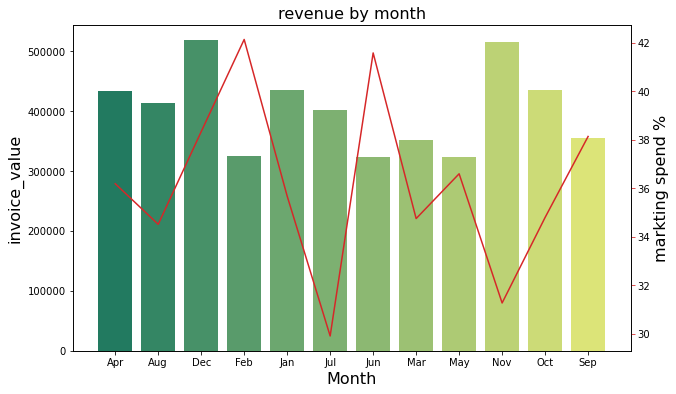

In [ ]:

fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('revenue by month', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('revenue', fontsize=16)
ax1 = sns.barplot(x='Month', y='invoice_value', data = df2, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('markting spend %', fontsize=16)
ax2 = sns.lineplot(x='Month', y='spend%_marketing', data = df2, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

##### • Which product was appeared in the transactions?


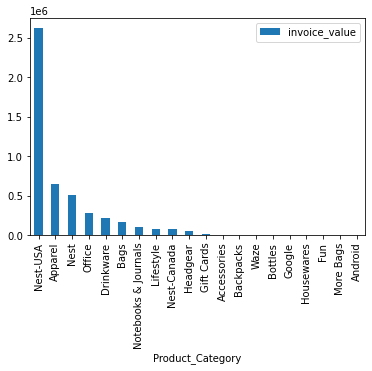

In [ ]:
sdt.groupby(by='Product_Category')[['invoice_value']].sum().sort_values(by='invoice_value',ascending=False).plot(kind='bar')
plt.show()

##### • Which product was purchased mostly based on the quantity?


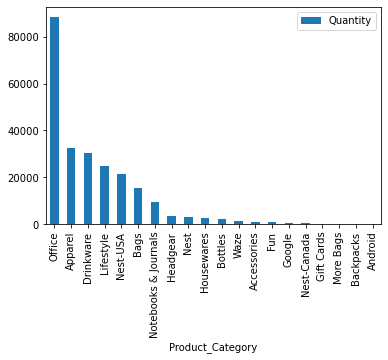

In [ ]:
sdt.groupby(by='Product_Category')[['Quantity']].sum().sort_values(by='Quantity',ascending=False).plot(kind='bar')
plt.show()

#### 3. Performing Customer Segmentation
##### • Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver,Standard customers and define strategy on the same.


In [ ]:
current_date = sdt['Transaction_Date'].max() + dt.timedelta(days=1)
current_date

Timestamp('2020-01-01 00:00:00')

In [ ]:
rfm = sdt.groupby(['CustomerID']).agg({'Transaction_Date': lambda x: (current_date - x.max()).days,
                                     'Transaction_ID':'count','invoice_value':'sum'})
rfm.rename(columns={'Transaction_Date':'Recency','Transaction_ID':'Frequency','invoice_value':'MonetaryValue'},inplace=True)

In [ ]:
r_labels=range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,9)

r_quartiles = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_quartiles = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_quartiles = pd.qcut(rfm['MonetaryValue'], q=8, labels=m_labels)

rfm=rfm.assign(R=r_quartiles, F=f_quartiles, M=m_quartiles)


In [ ]:
rfm['rfm_value'] = rfm['R'].astype(str).map(str) + rfm['F'].astype(str).map(str)  + rfm['M'].astype(str).map(str)
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

In [ ]:
rfm.groupby(['rfm_value']).size().sort_values(ascending=False)

rfm_value
448    89
111    67
211    56
348    46
436    44
       ..
138     1
227     1
121     1
438     1
128     1
Length: 89, dtype: int64

In [ ]:
rfm.groupby('RFM_Score').agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(0)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           286.0       2.0          85.0    67
4           222.0       4.0         248.0    97
5           188.0       7.0         420.0   111
6           170.0      10.0         625.0   124
7           165.0      13.0         973.0   115
8           158.0      16.0        1306.0   125
9           141.0      22.0        1616.0   107
10          146.0      27.0        2221.0   113
11          124.0      30.0        2808.0    95
12          139.0      42.0        3593.0   125
13          122.0      56.0        5384.0   124
14           86.0      67.0        5920.0   100
15           66.0     103.0        9914.0    76
16           27.0     133.0       14039.0    89

In [ ]:
def segmenting(df):
    if df['RFM_Score'] >= 13:
        return 'Premium'
    elif (df['RFM_Score'] >= 10) and (df['RFM_Score'] < 13):
        return 'Gold'
    elif (df['RFM_Score'] >= 7) and (df['RFM_Score'] < 10):
        return 'Silver'
    else:
        return 'Standard'

In [ ]:

rfm['Score_Segments'] = rfm.apply(segmenting, axis=1)

seg = rfm.groupby('Score_Segments').agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(0)
seg = seg.reset_index()

# sort
seg['Score_Segments'] = pd.Categorical(seg['Score_Segments'], ["Gold", "Silver", "Bronze", "Copper"])
seg.sort_values('Score_Segments')

Score_Segments Recency Frequency MonetaryValue      
                    mean      mean          mean count
0           Gold   137.0      34.0        2903.0   333
2         Silver   155.0      17.0        1291.0   347
1            NaN    80.0      86.0        8387.0   389
3            NaN   207.0       7.0         386.0   399

##### • Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.


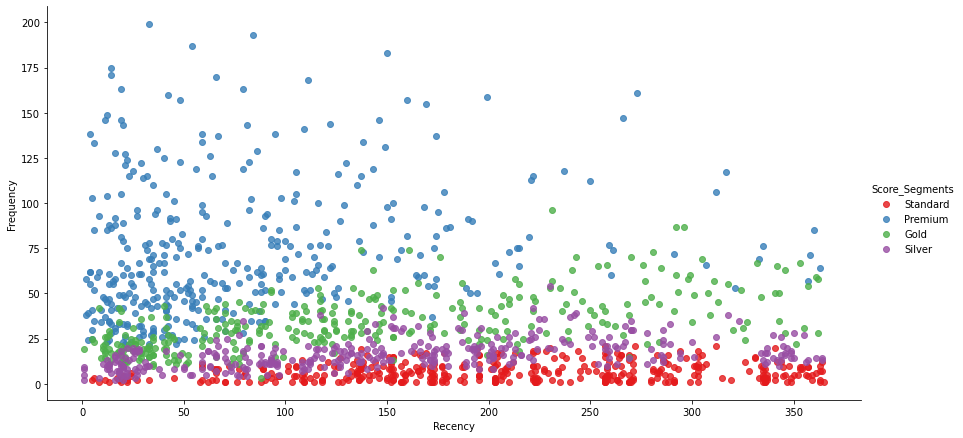

In [ ]:
dist = rfm[rfm.Frequency < 200] # as most of the frequency value is less than 200

sns.lmplot(x = 'Recency', y = 'Frequency', hue = 'Score_Segments', data = dist, palette = 'Set1', fit_reg = False, height = 6, aspect = 2)

#### scaling

In [ ]:
import math

# because log(0) in nan so we will hande it explicitly
# training dataset which only contain 3 features of RFM for finding optimal value of K in Kmeans
X_train = rfm.iloc[:, [0, 1, 2]]

# now we will apply changes to the X_training dataset instead of the original RFM dataset
X_train.Recency = rfm.Recency.apply(lambda x : 0 if x == 0 else round(math.log(x), 3))
X_train.Frequency = rfm.Frequency.apply(lambda x : 0 if x == 0 else round(math.log(x), 3))
X_train.Monetary = rfm.MonetaryValue.apply(lambda x : 0 if x == 0 else round(math.log(x), 3))

C:\Users\yoges\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-35-d00c00f7ca10>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_train.Monetary = rfm.MonetaryValue.apply(lambda x : 0 if x == 0 else round(math.log(x), 3))


In [ ]:
from sklearn.preprocessing import StandardScaler as scaler

sc = scaler() # create instance of Standardscaler

Scaled_Data = sc.fit_transform(X_train) # applying transformation to X_train

Scaled_Data = pd.DataFrame(Scaled_Data, index = rfm.index, columns = X_train.columns) # changing into dataframe again

C:\Users\yoges\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


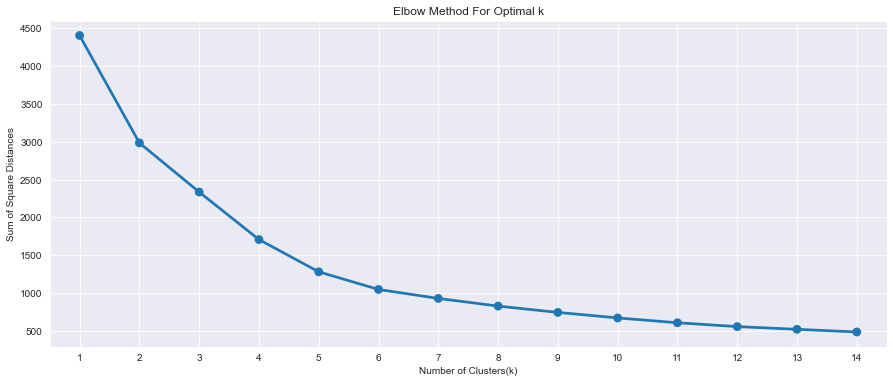

In [ ]:

from sklearn.cluster import KMeans

square_dist = [] # for storing square_distance after using Kmeans model
itr = [] # for storing iteration count

for i in range(1, 15) :
    model = KMeans(n_clusters = i, max_iter = 1000)
    model.fit(Scaled_Data)
    square_dist.append(model.inertia_)
    itr.append(i)

# now we will plot the graphical representaion of square distance and iterations
sns.set_style('darkgrid')
plt.figure(figsize = (15, 6))
sns.pointplot(itr, square_dist, col = 'b')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [ ]:
# Now we will build the model using K Means clustering.
model = KMeans(n_clusters = 4, max_iter = 1000) # explicitly passing number of iterations

# fitting scaled dataset into our Kmeans Model
model.fit(Scaled_Data)

# adding cluster variable to the RFM dataset to check membership level of customer.
rfm['Cluster'] = model.labels_ # labels_ returns the cluster of each datapoint (similar to y_pred).

rfm.head(5)

,Recency,Frequency,MonetaryValue,R,F,M,rfm_value,RFM_Score,Score_Segments,Cluster
CustomerID,,,,,,,,,,
12346,108,2,24.98174,3,1,1,311,5,Standard,1
12347,60,60,15021.70396,3,4,8,348,15,Premium,0
12348,74,23,1492.40594,3,3,4,334,10,Gold,0
12350,18,17,1339.55528,4,2,4,424,10,Gold,2
12356,108,36,1369.93900,3,3,4,334,10,Gold,0


#### 5. Cross-Selling (Which products are selling together)
##### • You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together.


In [ ]:
from apyori import apriori

In [ ]:
sdtc

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,month_int,Product_Category,Coupon_Code,Discount_pct,GST,invoice_value,Gender,Location,Tenure_Months,day
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,1,Nest-USA,ELEC10,10.0,0.10,152.17290,M,Chicago,12,01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,1,Nest-USA,ELEC10,10.0,0.10,152.17290,M,Chicago,12,01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,...,1,Office,OFF10,10.0,0.10,2.02950,M,Chicago,12,01
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,...,1,Apparel,SALE10,0.0,0.18,103.42700,M,Chicago,12,01
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,...,1,Bags,AIO10,10.0,0.18,17.52300,M,Chicago,12,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,...,12,Nest-USA,ELEC30,0.0,0.10,133.43000,F,New York,45,31
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,...,12,Apparel,SALE30,30.0,0.18,40.40792,F,New York,45,31
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,...,12,Nest-USA,ELEC30,30.0,0.10,116.94760,F,New York,45,31
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,12,Nest-USA,ELEC30,0.0,0.10,442.86000,F,California,7,31


In [ ]:
basket_plus=sdt.groupby(['Transaction_ID','Product_Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Transaction_ID')
basket_plus

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
###encoding
def encode_units(x):
    if x <= 0:
        return 0
    if x >=1:
        return 1
basket_encode_plus = basket_plus.applymap(encode_units)
basket_encode_plus

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
### filtering
basket_filter_plus=basket_encode_plus[(basket_encode_plus >0).sum(axis=1)>=2]
basket_filter_plus

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16692,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
### applying apriori algorithm
from mlxtend.frequent_patterns import apriori
frequet_itemsets_plus = apriori(basket_filter_plus,min_support=0.03,
                               use_colnames=True).sort_values('support',ascending=False).reset_index(drop=True)
frequet_itemsets_plus['length']=frequet_itemsets_plus['itemsets'].apply(lambda x:len(x))
frequet_itemsets_plus


,support,itemsets,length
0,0.134705,(Nest Cam Outdoor Security Camera - USA),1
1,0.114628,(Nest Cam Indoor Security Camera - USA),1
2,0.092572,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,1
3,0.074770,(Google Laptop and Cell Phone Stickers),1
4,0.069924,(Nest Protect Smoke + CO White Battery Alarm-USA),1
5,0.068539,"(Nest Cam Indoor Security Camera - USA, Nest C...",2
6,0.062308,(Google 22 oz Water Bottle),1
7,0.056671,(Google Sunglasses),1
8,0.051034,(Nest Protect Smoke + CO White Wired Alarm-USA),1
9,0.040946,(Google Men's 100% Cotton Short Sleeve Hero Te...,1


In [ ]:
### finding association
from mlxtend.frequent_patterns import association_rules

In [ ]:
association_rules(frequet_itemsets_plus,metric='lift',min_threshold=1).sort_values('lift',ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.114628,0.134705,0.068539,0.597929,4.438813,0.053098,2.152097
1,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.134705,0.114628,0.068539,0.508811,4.438813,0.053098,1.802507


#### 6. Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)


###### using xgboost and taking rfm values in consideration for higher accuracy

In [ ]:
#split data 9 month and 3 month
df_6m = onlinesales[(onlinesales.Transaction_Date >= '2019-01-01') & (onlinesales.Transaction_Date < '2019-09-01')].reset_index(drop=True)

In [ ]:
df_next= onlinesales[(onlinesales.Transaction_Date > '2019-09-01') ].reset_index(drop=True)

In [ ]:
df_user = pd.DataFrame(df_6m['CustomerID'].unique())
df_user.columns = ['CustomerID']

In [ ]:
#create a dataframe with customer id and first purchase date in df_next
df_next_first_purchase = df_next.groupby(['CustomerID'])['Transaction_Date'].min().reset_index()
df_next_first_purchase.columns = ['CustomerID','MinPurchaseDate']

#create a dataframe with customer id and last purchase date in df_6m
df_last_purchase = df_6m.groupby(['CustomerID'])['Transaction_Date'].max().reset_index()
df_last_purchase.columns = ['CustomerID','MaxPurchaseDate']

In [ ]:
#merge two dataframes
df_purchase_dates = pd.merge(df_last_purchase,df_next_first_purchase, on='CustomerID', how='left')

In [ ]:
df_purchase_dates['NextPurchaseDate'] = (df_purchase_dates['MinPurchaseDate'] - df_purchase_dates['MaxPurchaseDate'] ).dt.days

In [ ]:
#merge with df_user
df_user = pd.merge(df_user,df_purchase_dates[['CustomerID','NextPurchaseDate']], on='CustomerID', how='left')

In [ ]:
#fill NA values with 999
df_user = df_user.fillna(999)

In [ ]:
## for recency
#get max purchase date for Recency and create a dataframe
df_max_purchase = df_6m.groupby(['CustomerID'])['Transaction_Date'].max().reset_index()
df_max_purchase.columns=['CustomerID','MaxPurchaseDate']
df_max_purchase['Recency'] = (df_max_purchase['MaxPurchaseDate'].max() - df_max_purchase['MaxPurchaseDate']) .dt.days
df_user = pd.merge(df_user,df_max_purchase[['CustomerID','Recency']])
#Clustering for Recency
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_user[['Recency']])
df_user['RecencyCluster'] = kmeans.predict(df_user[['Recency']])
#order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


#order recency clusters
df_user = order_cluster('RecencyCluster', 'Recency',df_user,False)

In [ ]:
# for frequency
#get total purchases for frequency scores
df_frequency = df_6m.groupby('CustomerID').Transaction_Date.count().reset_index()
df_frequency.columns = ['CustomerID','Frequency']

#add frequency column to df_user
df_user = pd.merge(df_user, df_frequency, on='CustomerID')
#Clustering for frequency
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_user[['Frequency']])
df_user['FrequencyCluster'] = kmeans.predict(df_user[['Frequency']])

#order frequency clusters and show the characteristics
df_user = order_cluster('FrequencyCluster', 'Frequency',df_user,True)

In [ ]:
# for monetory
#calculate monetary value, create a dataframe with it
df_6m['Revenue'] = df_6m['Avg_Price'] * df_6m['Quantity']
df_revenue = df_6m.groupby('CustomerID').Revenue.sum().reset_index()

#add Revenue column to df_user
df_user = pd.merge(df_user, df_revenue, on='CustomerID')
#Revenue clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_user[['Revenue']])
df_user['RevenueCluster'] = kmeans.predict(df_user[['Revenue']])

#ordering clusters and who the characteristics
df_user = order_cluster('RevenueCluster', 'Revenue',df_user,True)
df_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,927.0,1276.026332,1055.358849,1.20,386.3550,996.740,1983.1050,3984.48
1,188.0,6779.291436,2231.453422,4114.40,5136.7525,6224.115,7786.1250,13903.71
2,12.0,23520.288333,6760.123612,16151.63,17748.8575,21262.485,29128.2825,34551.40
3,2.0,64368.735000,13974.289687,54487.42,59428.0775,64368.735,69309.3925,74250.05


In [ ]:
#building overall segmentation
df_user['OverallScore'] = df_user['RecencyCluster'] + df_user['FrequencyCluster'] + df_user['RevenueCluster']

#assign segment names
df_user['Segment'] = 'Low-Value'
df_user.loc[df_user['OverallScore']>2,'Segment'] = 'Mid-Value'
df_user.loc[df_user['OverallScore']>4,'Segment'] = 'High-Value'

In [ ]:
df_6m["InvoiceDate"] = pd.to_datetime(df_6m["Transaction_Date"])
#create a dataframe with CustomerID and Invoice Date
df_day_order = df_6m[['CustomerID','Transaction_Date']]
#convert Invoice Datetime to day
df_day_order['InvoiceDay'] = df_6m['Transaction_Date'].dt.date

<ipython-input-59-dce3dad99544>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day_order['InvoiceDay'] = df_6m['Transaction_Date'].dt.date


In [ ]:
df_day_orderdf_day_order = df_day_order.sort_values(['CustomerID','Transaction_Date'])
#drop duplicates
df_day_order = df_day_order.drop_duplicates(subset=['CustomerID','Transaction_Date'],keep='first')

In [ ]:
#shifting last 3 purchase dates
df_day_order['PrevInvoiceDate'] = df_day_order.groupby('CustomerID')['Transaction_Date'].shift(1)
df_day_order['T2InvoiceDate'] = df_day_order.groupby('CustomerID')['Transaction_Date'].shift(2)
df_day_order['T3InvoiceDate'] = df_day_order.groupby('CustomerID')['Transaction_Date'].shift(3)

In [ ]:
df_day_order

,CustomerID,Transaction_Date,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate
0,17850,2019-01-01,2019-01-01,NaT,NaT,NaT
9,13047,2019-01-01,2019-01-01,NaT,NaT,NaT
26,12583,2019-01-01,2019-01-01,NaT,NaT,NaT
46,13748,2019-01-01,2019-01-01,NaT,NaT,NaT
65,15100,2019-01-01,2019-01-01,NaT,NaT,NaT
...,...,...,...,...,...,...
35874,17581,2019-08-31,2019-08-31,2019-08-27,2019-07-14,2019-01-25
35896,13090,2019-08-31,2019-08-31,2019-04-20,2019-04-13,2019-01-16
35899,14175,2019-08-31,2019-08-31,NaT,NaT,NaT
35915,18106,2019-08-31,2019-08-31,NaT,NaT,NaT


In [ ]:
df_day_order['DayDiff'] = (df_day_order['Transaction_Date'] - df_day_order['PrevInvoiceDate']).dt.days
df_day_order['DayDiff2'] = (df_day_order['Transaction_Date'] - df_day_order['T2InvoiceDate']).dt.days
df_day_order['DayDiff3'] = (df_day_order['Transaction_Date'] - df_day_order['T3InvoiceDate']).dt.days

In [ ]:
df_day_diff = df_day_order.groupby('CustomerID').agg({'DayDiff': ['mean','std']}).reset_index()
df_day_diff.columns = ['CustomerID', 'DayDiffMean','DayDiffStd']
df_day_order_last = df_day_order.drop_duplicates(subset=['CustomerID'],keep='last')
df_day_order_last = df_day_order_last.dropna()
df_day_order_last = pd.merge(df_day_order_last, df_day_diff, on='CustomerID')
df_day_order_last.head()

,CustomerID,Transaction_Date,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate,DayDiff,DayDiff2,DayDiff3,DayDiffMean,DayDiffStd
0,17850,2019-01-26,2019-01-26,2019-01-24,2019-01-22,2019-01-21,2.0,4.0,5.0,2.777778,3.527668
1,17228,2019-03-20,2019-03-20,2019-03-19,2019-01-28,2019-01-27,1.0,51.0,52.0,17.333333,28.290163
2,17827,2019-04-26,2019-04-26,2019-04-25,2019-04-24,2019-04-23,1.0,2.0,3.0,1.000000,0.000000
3,16393,2019-05-06,2019-05-06,2019-05-05,2019-05-04,2019-02-23,1.0,2.0,72.0,24.000000,39.837169
4,14796,2019-05-13,2019-05-13,2019-05-12,2019-03-28,2019-03-27,1.0,46.0,47.0,15.666667,25.403412


In [ ]:
df_user = pd.merge(df_user, df_day_order_last[['CustomerID','DayDiff','DayDiff2','DayDiff3','DayDiffMean','DayDiffStd']], on='CustomerID')
#create tx_class as a copy of tx_user before applying get_dummies
df_class = df_user.copy()
df_class = pd.get_dummies(df_class)

In [ ]:
df_class.head()

,CustomerID,NextPurchaseDate,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,DayDiff,DayDiff2,DayDiff3,DayDiffMean,DayDiffStd,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,17850,999.0,217,0,297,3,34551.40,2,5,2.0,4.0,5.0,2.777778,3.527668,1,0,0
1,14911,34.0,19,3,346,3,32065.38,2,8,1.0,22.0,28.0,12.529412,13.505173,1,0,0
2,17841,14.0,8,3,427,3,32321.81,2,8,12.0,37.0,53.0,18.666667,15.310919,1,0,0
3,14606,18.0,7,3,360,3,28149.25,2,8,1.0,14.0,38.0,14.666667,17.128367,1,0,0
4,13081,999.0,0,3,261,3,19576.40,2,8,30.0,31.0,38.0,40.600000,70.009285,1,0,0


<AxesSubplot:>

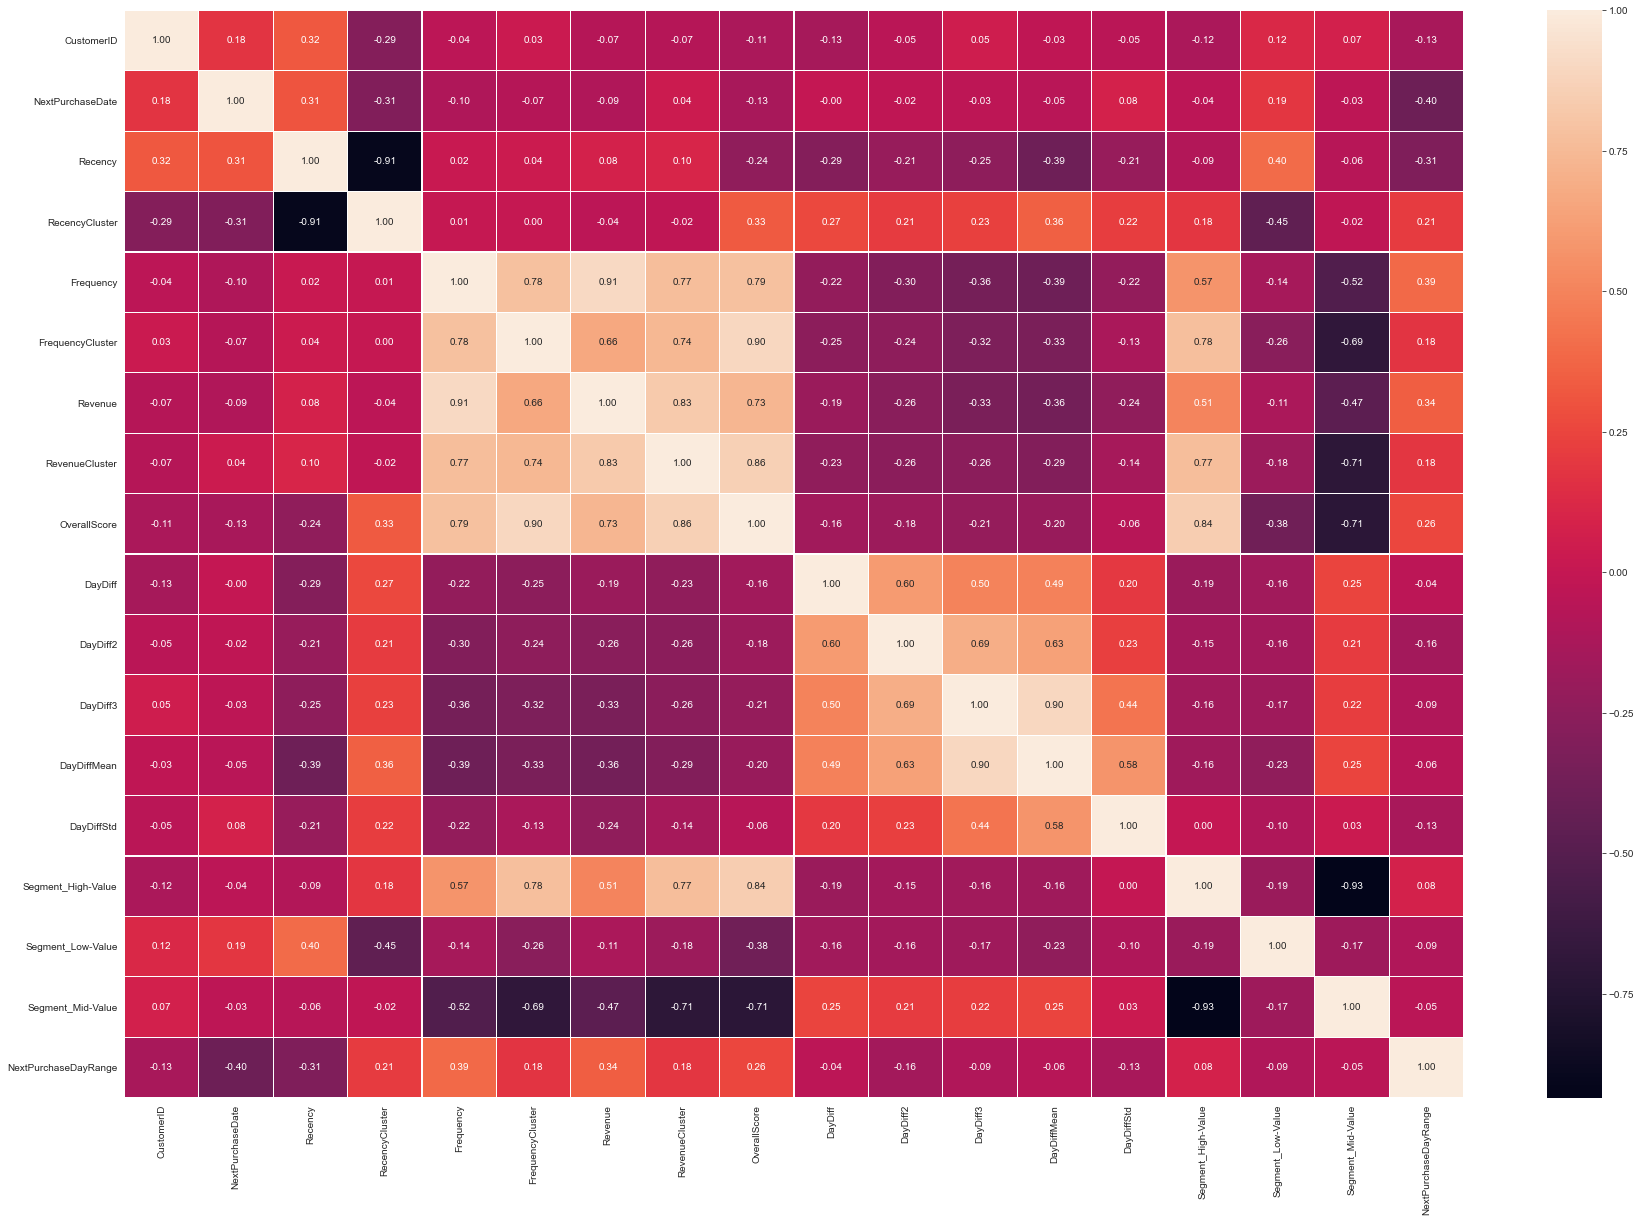

In [ ]:
df_class['NextPurchaseDayRange'] = 2
df_class.loc[df_class.NextPurchaseDate>20,'NextPurchaseDayRange'] = 1
df_class.loc[df_class.NextPurchaseDate>50,'NextPurchaseDayRange'] = 0
corr = df_class[df_class.columns].corr()
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, linewidths=0.2, fmt=".2f")

In [ ]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            118 non-null    int64  
 1   NextPurchaseDate      118 non-null    float64
 2   Recency               118 non-null    int64  
 3   RecencyCluster        118 non-null    int64  
 4   Frequency             118 non-null    int64  
 5   FrequencyCluster      118 non-null    int64  
 6   Revenue               118 non-null    float64
 7   RevenueCluster        118 non-null    int64  
 8   OverallScore          118 non-null    int64  
 9   DayDiff               118 non-null    float64
 10  DayDiff2              118 non-null    float64
 11  DayDiff3              118 non-null    float64
 12  DayDiffMean           118 non-null    float64
 13  DayDiffStd            118 non-null    float64
 14  Segment_High-Value    118 non-null    uint8  
 15  Segment_Low-Value     1

In [ ]:
df_class = df_class.drop('NextPurchaseDate',axis=1)

In [ ]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [ ]:
#train & test split
from sklearn.model_selection import StratifiedKFold
X, y = df_class.drop('NextPurchaseDayRange',axis=1), df_class.NextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

#measure the accuracy
for name,model in models:
    #kfold = model_selection.KFold(n_splits=10,random_state=seed)
    kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=44)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    print(name, cv_result)

C:\Users\yoges\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\yoges\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


LR [nan nan]
NB [0.78723404 0.59574468]
RF [0.76595745 0.82978723]
SVC [0.76595745 0.78723404]
Dtree [0.70212766 0.63829787]


C:\Users\yoges\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:34:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:34:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB [0.74468085 0.78723404]
KNN [0.74468085 0.78723404]


In [ ]:
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

C:\Users\yoges\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 0.83


#### 7. Perform cohort analysis by defining below cohorts
##### • Customers who started in each month and understand their behaviour


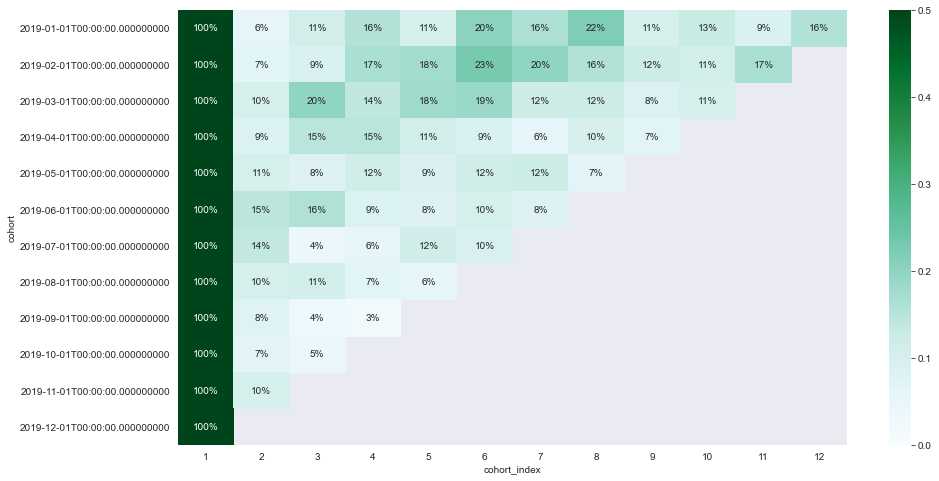

In [ ]:
## performing cohort analysis for customer retention
onlinesales['transaction_month']=onlinesales.Transaction_Date.apply(lambda x :dt.datetime(x.year, x.month, 1))
grouping = onlinesales.groupby('CustomerID')['transaction_month']
onlinesales['cohort'] = grouping.transform('min')

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    date = df[column].dt.date
    return year, month, date
transaction_year,transaction_month, _=get_date_int(onlinesales,'transaction_month')
cohort_year,cohort_month, _= get_date_int(onlinesales,'cohort')
year_diff = transaction_year - cohort_year
month_diff = transaction_month - cohort_month
onlinesales['cohort_index'] = year_diff*12 + month_diff +1

grouping1 = onlinesales.groupby(['cohort', 'cohort_index'])

cohort_data = grouping1['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index="cohort",columns="cohort_index",values="CustomerID")
retention = cohort_counts


cohort_size = cohort_counts.iloc[:,0]

retention_per = cohort_counts.divide(cohort_size, axis=0)

retention_per.round(3)*100

plt.figure(figsize=(15,8))
sns.heatmap(data = retention_per,annot=True,fmt='.0%',vmin=0.0,vmax=0.5,cmap='BuGn')
plt.show()

##### • Which Month cohort has maximum retention?

In [ ]:
### june